# 4 분류

## 4 - 1 분류(Classification)의 개요

## 4-2 결정 트리

### 결정 트리 모델의 특징

### 결정 트리 파라미터

### 결정 트리 모델의 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris( )
X_train, X_test , y_train , y_test = train_test_split(iris_data.data , iris_data.target, test_size = 0.2 , random_state = 11)


#DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot" , class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity = True, filled = True)

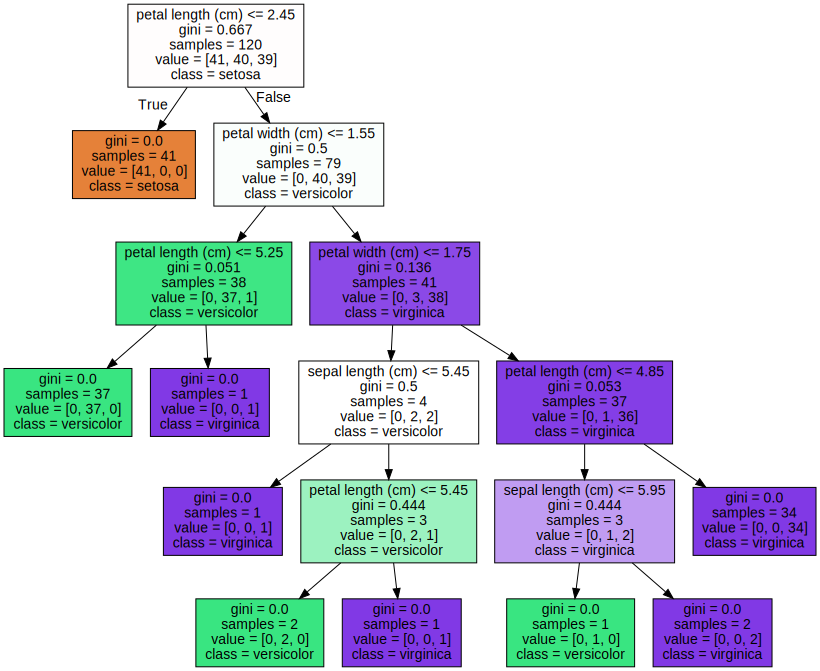

In [ ]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북 상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


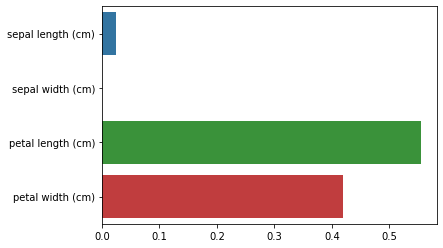

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.3f}".format(name , value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)

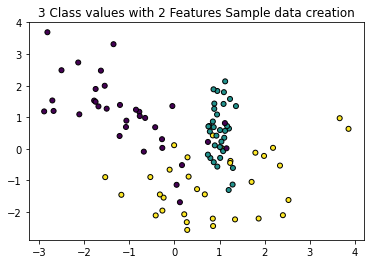

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features = 2 , n_redundant=0, n_informative = 2, n_classes=3, n_clusters_per_class=1, random_state = 0)
# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features , y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: ignored

In [ ]:
#min _samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [ ]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/UCI HAR Dataset/UCI HAR Dataset

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/UCI HAR Dataset/UCI HAR Dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어ㅓ 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('features.txt', sep='\s+', header = None, names = ['column_index' , 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:' , feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count() )
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


column_index
column_name                               
fBodyAcc-bandsEnergy()-1,16              3
fBodyAcc-bandsEnergy()-1,24              3
fBodyAcc-bandsEnergy()-1,8               3
fBodyAcc-bandsEnergy()-17,24             3
fBodyAcc-bandsEnergy()-17,32             3

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount() , columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index() , feature_dup_df , how = 'outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name' , 'dup_cnt']].apply(lambda x : x[0] + '_' + str(x[1]) if x[1] > 0 else x[0] , axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):

    #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt', sep='\s+' , header = None , names = ['column_index' , 'column_name'])

    #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    #학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('train/X_train.txt' , sep='\s+' , names=feature_name)
    X_test = pd.read_csv('test/X_test.txt' , sep='\s+' , names = feature_name)

    #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('train/y_train.txt', sep='\s+' , header = None , names = ['action'])
    y_test = pd.read_csv('test/y_test.txt' , sep = '\s+' , header = None , names=['action'])

    #로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test , y_train, y_test


X_train, X_test , y_train, y_test = get_human_dataset()


In [ ]:
X_train.head()

tBodyAcc-mean()-X  ...  angle(Z,gravityMean)
0           0.288585  ...             -0.058627
1           0.278419  ...             -0.054317
2           0.279653  ...             -0.049118
3           0.279174  ...             -0.047663
4           0.276629  ...             -0.043892

[5 rows x 561 columns]

In [ ]:
print("## 학습 피처 데이터셋 info( ) ")
print(X_train.info( ))

## 학습 피처 데이터셋 info( ) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts( ))

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이처 파라미터:\n' , dt_clf.get_params( )) 

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이처 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf , param_grid=params, scoring='accuracy' , cv=5 , verbose = 1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [ ]:
#GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

param_max_depth  mean_test_score
0               6         0.850791
1               8         0.851069
2              10         0.851209
3              12         0.844135
4              16         0.851344
5              20         0.850800
6              24         0.849440

In [ ]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth= depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [ ]:
params = {
    'max_depth' : [8,12,16,20],
    'min_samples_split' : [16,24]
}

grid_cv = GridSearchCV(dt_clf , param_grid=params , scoring='accuracy', cv = 5 , verbose = 1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


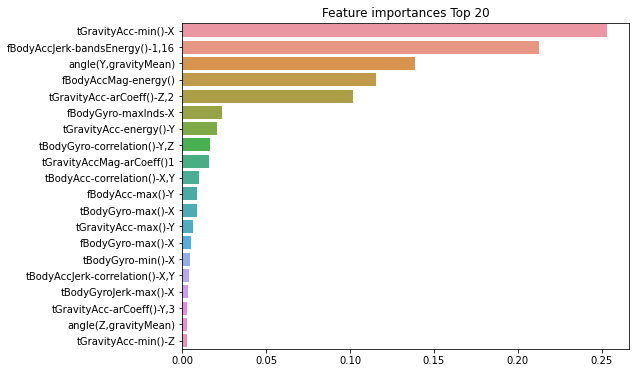

In [ ]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
#Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

## 4-3 앙상블 학습

###앙상블 학습 개요

### 보팅 유형 - 하드보팅과 소프트 보팅

### 보팅 분류기 (Voting Classifier)

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer( )

data_df = pd.DataFrame(cancer.data , columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758

[3 rows x 30 columns]

In [ ]:
#개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier( estimators=[('LR', lr_clf), ('KNN' , knn_clf)] , voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

#VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name =classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## 4-4 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame반환
X_train, X_test, y_train , y_test = get_human_dataset()

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평과
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


###랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0 , n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv= 2 , n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10 , min_samples_leaf=8, \
                                 min_samples_split=8 , random_state = 0)
rf_clf1.fit(X_train, y_train)
pred= rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


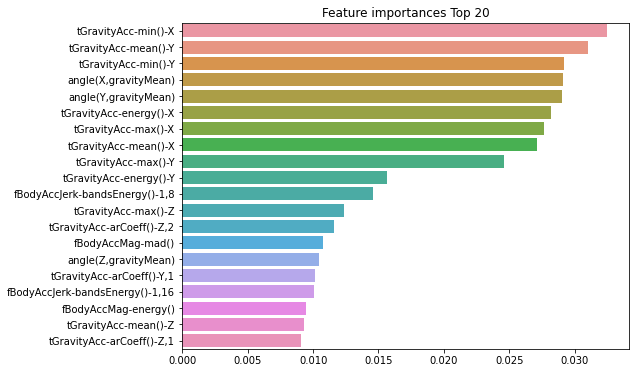

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 4-5 GBM (Gradient Boosting Machine)

### GBM의 개요 및 실습

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train , X_test , y_train , y_test = get_human_dataset( )

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time( )

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy(y_test, gb_pred)

print('GBM 정확도: {0:.4}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.f} 초'.format(time.time() - start_time ))

TypeError: ignored

In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   action  2947 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


In [ ]:
gb_accuracy = accuracy(y_test, gb_pred)

TypeError: ignored

###GBM 하이퍼 파라미터 및 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf , param_grid=params, cv= 2 , verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
#GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test , gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

## 4-6 XGBoost(eXtra Gradient Boost)

In [ ]:
!pip install -q xgboost==0.4a30

import xgboost

     |████████████████████████████████| 753 kB 8.1 MB/s 


### XGBoost 설치하기

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

### 파이썬 래퍼 XGBoost 하이퍼 파라미터

In [ ]:
print(xgboost.__version__)

0.4


### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df ['target'] = y_label
cancer_df.head(3)

mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0

[3 rows x 31 columns]

In [ ]:
print(dataset.target_names)
print( cancer_df['target'].value_counts() )

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train , X_test , y_train , y_test = train_test_split( X_features , y_label , test_size = 0.2 , random_state = 156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [ ]:
dtrain = xgb.DMatrix( data=X_train , label = y_train )
dtest = xgb.DMatrix( data=X_test , label = y_test )

In [ ]:
params = { 'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
        }      
num_rounds = 400

In [ ]:
#train 데이터 세트는 'train' , evaluation(test) 데이터 세트는 'eval'로 명기합니다.
wlist = [(dtrain, 'train') , (dtest , 'eval')]
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds, early_stopping_rounds= 100 , evals = wlist)

Will train until eval error hasn't decreased in 100 rounds.
[0]	train-logloss:0.609688	eval-logloss:0.613520
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.390550	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.297210
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.220050
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.143330	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729


In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시 , 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10] , 3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:', preds[:10])

predict( ) 수행 결과값을 10개만 표시 , 예측 확률값으로 표시됨
[0.938 0.003 0.896 0.073 0.993 1.    1.    0.999 0.996 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드


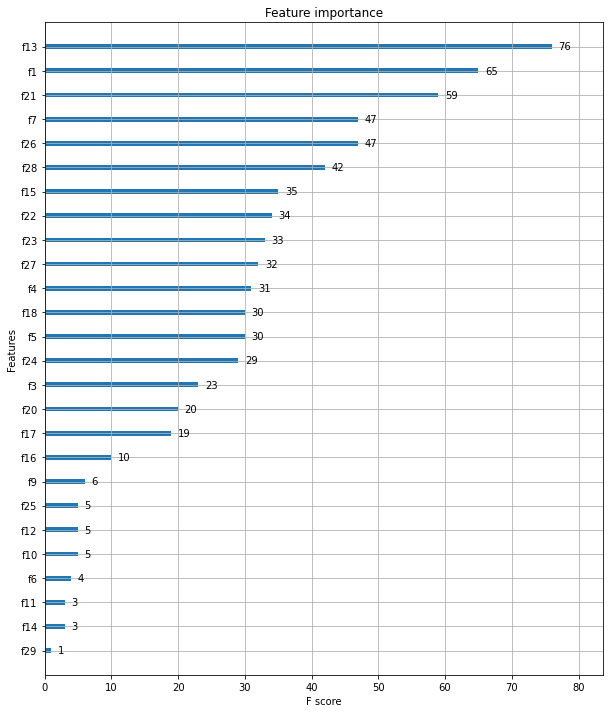

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig , ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax=ax)

### 사이킷런 래퍼 XGBoost의 개요 및 적용

In [ ]:
#사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400 , learning_rate = 0.1 , max_depth=3)
xgb_wrapper.fit(X_train , y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400 , learning_rate=0.1 , max_depth=3)
evals = [(X_test , y_test)]
xgb_wrapper.fit(X_train, y_train , early_stopping_rounds=100 , eval_metric="logloss" , eval_set=evals , verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

Will train until validation_0 error hasn't decreased in 100 rounds.
[0]	validation_0-logloss:0.613520
[1]	validation_0-logloss:0.547843
[2]	validation_0-logloss:0.494248
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.297210
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.220050
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154432
[22]	validation_0-logloss:0.148656
[23]	validation_0-logloss:0.141245
[24]	validation_0-logloss:0.136042
[25]	validation_0-logloss:0.132487
[26]	validation_0-logloss:0.1276

In [ ]:
#early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train , y_train , early_stopping_rounds=10 , eval_metric="logloss" , eval_set = evals, verbose = True)

ws10_preds = xgb_wrapper.predict(X_test)
ws_10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

Will train until validation_0 error hasn't decreased in 10 rounds.
[0]	validation_0-logloss:0.613520
[1]	validation_0-logloss:0.547843
[2]	validation_0-logloss:0.494248
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.297210
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.220050
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154432
[22]	validation_0-logloss:0.148656
[23]	validation_0-logloss:0.141245
[24]	validation_0-logloss:0.136042
[25]	validation_0-logloss:0.132487
[26]	validation_0-logloss:0.12763

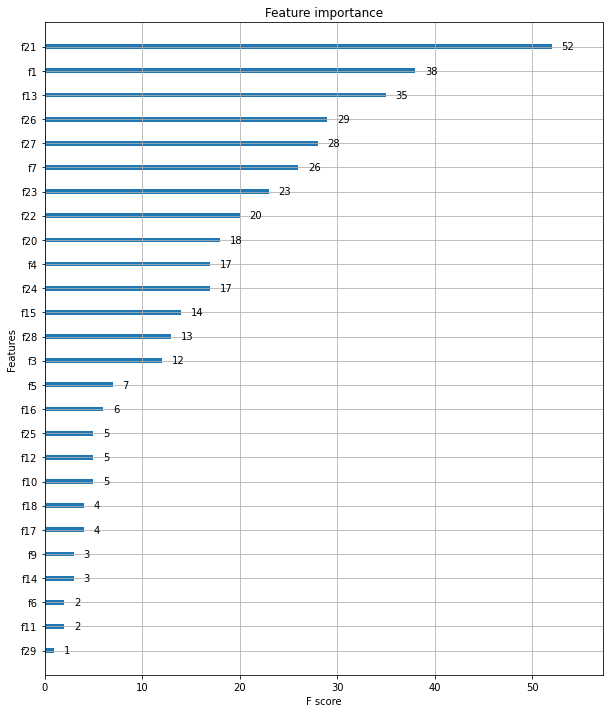

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
#사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)

## 4-7 LightGBM

In [ ]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 24874, done.
remote: Counting objects: 100% (550/550), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 24874 (delta 340), reused 404 (delta 236), pack-reused 24324
Receiving objects: 100% (24874/24874), 18.54 MiB | 5.07 MiB/s, done.
Resolving deltas: 100% (18289/18289), done.
Checking out files: 100% (481/481), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/drive/My Drive/AI/파이썬 머신러닝 완벽가이드/LightGBM/external_libs/compute'...
remote: Enumerating o

In [ ]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/LightGBM

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/LightGBM


In [ ]:
!mkdir build
!cmake -DUSE_GPU=1
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd /content/LightGBM/python-package/
!sudo python setup.py install --precompile

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

### LightGBM 적용 - 위스콘신 유방암 예측

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

#전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test , y_train , y_test = train_test_split(ftr, target, test_size=0.2, random_state = 156)

#앞서 XGBoost와 동일하게 n_estimators는 400설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)

#앞서 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test , y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100, eval_metric="logloss", eval_set = evals , verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

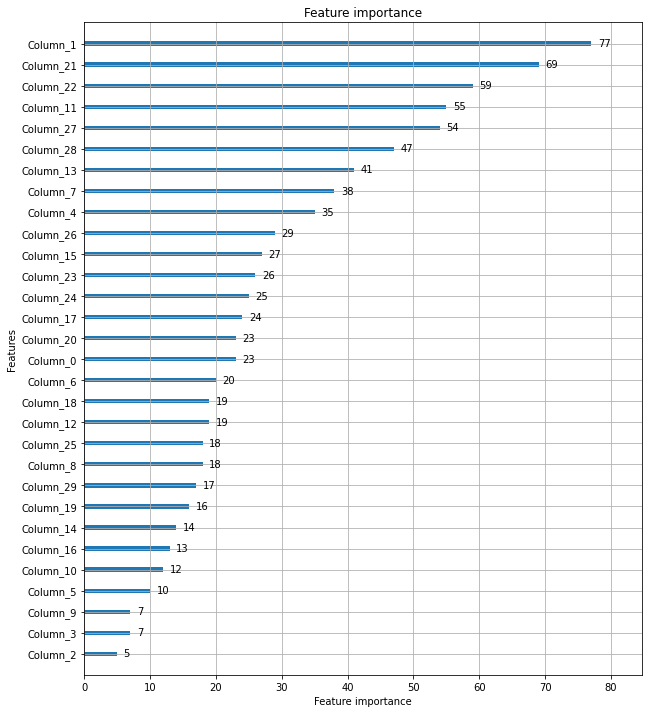

In [ ]:
#plot_importance( )를 이용해 피처 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig , ax = plt.subplots( figsize = (10 , 12))
plot_importance(lgbm_wrapper , ax = ax)

## 4-8 분류실습 - 캐글 산탄데르 고객 만족 예측


### 데이터 전처리

In [ ]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/santander-customer-satisfaction

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/santander-customer-satisfaction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("train.csv" , encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


ID  var3  var15  ...  saldo_medio_var44_ult3     var38  TARGET
0   1     2     23  ...                     0.0  39205.17       0
1   3     2     34  ...                     0.0  49278.03       0
2   4     2     23  ...                     0.0  67333.77       0

[3 rows x 371 columns]

In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:

print(cust_df['TARGET'].value_counts())
unsatisfied_cnt  = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format( (unsatisfied_cnt / total_cnt)) )

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [ ]:

cust_df.describe()

ID           var3  ...         var38        TARGET
count   76020.000000   76020.000000  ...  7.602000e+04  76020.000000
mean    75964.050723   -1523.199277  ...  1.172358e+05      0.039569
std     43781.947379   39033.462364  ...  1.826646e+05      0.194945
min         1.000000 -999999.000000  ...  5.163750e+03      0.000000
25%     38104.750000       2.000000  ...  6.787061e+04      0.000000
50%     76043.000000       2.000000  ...  1.064092e+05      0.000000
75%    113748.750000       2.000000  ...  1.187563e+05      0.000000
max    151838.000000     238.000000  ...  2.203474e+07      1.000000

[8 rows x 371 columns]

In [ ]:
print( cust_df.var3.value_counts() )

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64


In [ ]:
cust_df['var3'].replace(-999999, 2, inplace=True)
#cust_df.drop('ID' , axis = 1 , inplace = True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 370)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X_features, y_labels, test_size = 0.2 , random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() /train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape:(60816, 370), 테스트 세트 Shape:(15204, 370)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


###XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500 , random_state=156)

#성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100 , eval_metric="auc" , eval_set = [ (X_train , y_train) , (X_test , y_test)])

xgb_roc_score = roc_auc_score(y_test , xgb_clf.predict_proba(X_test)[:,1] , average = 'macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators 를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

#cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv= 3)
gridcv.fit(X_train , y_train, early_stopping_rounds=30, eval_metric="auc" , eval_set = [ (X_train, y_train) , (X_test , y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

In [ ]:
xgb_roc_score = roc_auc_score(y_test , gridcv.predict_proba(X_test)[:,1] , average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8447


In [ ]:
#n_estimators는 1000으로 증가시키고, learning_rate = 0.02로 감소, reg_alpha=0.03으로 추가함.
xgb_clf = XGBClassifier(n_estimators = 1000 , random_state =156 , learning_rate = 0.02 , max_depth = 7 , min_child_weight = 1 , colsmaple_bytree=0.75, reg_alpha=0.03)

#성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train , y_train, early_stopping_rounds=200, eval_metric="auc" , eval_set = [ (X_train , y_train) , (X_test , y_test)])



[0]	validation_0-auc:0.824205	validation_1-auc:0.814498
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.826978	validation_1-auc:0.815702
[2]	validation_0-auc:0.829463	validation_1-auc:0.816991
[3]	validation_0-auc:0.829099	validation_1-auc:0.817132
[4]	validation_0-auc:0.829017	validation_1-auc:0.81721
[5]	validation_0-auc:0.829255	validation_1-auc:0.817488
[6]	validation_0-auc:0.829332	validation_1-auc:0.817399
[7]	validation_0-auc:0.830047	validation_1-auc:0.817418
[8]	validation_0-auc:0.830255	validation_1-auc:0.817581
[9]	validation_0-auc:0.830059	validation_1-auc:0.817794
[10]	validation_0-auc:0.831185	validation_1-auc:0.818855
[11]	validation_0-auc:0.832886	validation_1-auc:0.820221
[12]	validation_0-auc:0.8345	validation_1-auc:0.821623
[13]	validation_0-auc:0.83755	validation_1-auc:0.825655
[14]	validation_0-auc:0.838667	validation_1-auc:0.826227
[

ValueError: ignored

In [ ]:
xgb_roc_score = roc_auc_score(y_test , xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

ROC AUC: 0.8426


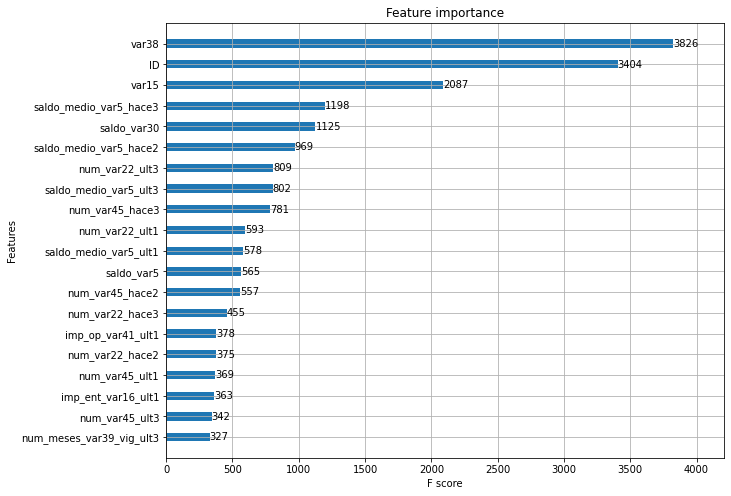

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
plot_importance(xgb_clf, ax=ax , max_num_features=20 , height=0.4)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test , y_test)]
lgbm_clf.fit(X_train, y_train , early_stopping_rounds = 100 , eval_metric="auc" , eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1] , average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817877	valid_0's binary_logloss: 0.165052
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.817734	valid_0's binary_logloss: 0.160082
[3]	valid_0's auc: 0.826796	valid_0's binary_logloss: 0.156395
[4]	valid_0's auc: 0.831011	valid_0's binary_logloss: 0.15354
[5]	valid_0's auc: 0.833917	valid_0's binary_logloss: 0.151312
[6]	valid_0's auc: 0.833856	valid_0's binary_logloss: 0.149504
[7]	valid_0's auc: 0.83643	valid_0's binary_logloss: 0.148079
[8]	valid_0's auc: 0.837348	valid_0's binary_logloss: 0.146815
[9]	valid_0's auc: 0.839167	valid_0's binary_logloss: 0.145641
[10]	valid_0's auc: 0.838244	valid_0's binary_logloss: 0.144916
[11]	valid_0's auc: 0.838277	valid_0's binary_logloss: 0.144231
[12]	valid_0's auc: 0.838228	valid_0's binary_logloss: 0.143605
[13]	valid_0's auc: 0.838763	valid_0's binary_logloss: 0.142999
[14]	valid_0's auc: 0.838946	valid_0's binary_logloss: 0.142441
[15]	valid_0's auc: 0.838022	valid_0's binary_loglos

In [ ]:
from sklearn.model_selection import GridSearchCV

#하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32,64] ,
          'max_depth': [128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train , y_train , early_stopping_rounds=30 , eval_metric="auc", eval_set = [ (X_train , y_train) , (X_test , y_test)])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.81963	valid_0's binary_logloss: 0.156025	valid_1's auc: 0.81308	valid_1's binary_logloss: 0.16495
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.826102	valid_0's binary_logloss: 0.150833	valid_1's auc: 0.821896	valid_1's binary_logloss: 0.159789
[3]	valid_0's auc: 0.832676	valid_0's binary_logloss: 0.147039	valid_1's auc: 0.827724	valid_1's binary_logloss: 0.156304
[4]	valid_0's auc: 0.838334	valid_0's binary_logloss: 0.144062	valid_1's auc: 0.833121	valid_1's binary_logloss: 0.153321
[5]	valid_0's auc: 0.843058	valid_0's binary_logloss: 0.141603	valid_1's auc: 0.837195	valid_1's binary_logloss: 0.151033
[6]	valid_0's auc: 0.845098	valid_0's binary_logloss: 0.139577	valid_1's auc: 0.8372	valid_1's binary_logloss: 0.149111
[7]	valid_0's auc: 0.845933	valid_0's binary_logloss: 0.137936	valid_1's auc: 0.837607	valid_1's binary_logloss: 0.147638
[8]	valid_0's auc: 0.848139	valid_0's binary_logloss: 0.136541	valid_1's auc: 0.83838	val

In [ ]:

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples = 100 , max_depth=128)

evals = [(X_test , y_test)]
lgbm_clf.fit(X_train, y_train , early_stopping_rounds=100 , eval_metric="auc", eval_set = evals , verbose = True)

lgbm_roc_score = roc_auc_score(y_test , lgbm_clf.predic_proba(X_test)[:,1] , average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

## 4-9 분류 실습 - 캐글 신용카드 사기 검출 

### 언더 샘플링과 오버 샘플링의 이해

In [ ]:
pip install imbalanced-learn

In [ ]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/Credit_archive

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/Credit_archive


### 데이터 일차 가공 및 모델 학습/예측/평가

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0

[3 rows x 31 columns]

In [ ]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [ ]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DatraFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[: ,:-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify = y_target 으로 Stratified 기반 분할
    X_train, X_test , y_train , y_test = \
    train_test_split(X_features, y_target , test_size = 0.3 , random_state = 0 , stratify=y_target)
    #학습과 테스트 데이터 세트 반환
    return X_train, X_test , y_train, y_test


X_train , X_test , y_train , y_test = get_train_test_dataset(card_df)

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts( ) / y_train.shape[0] * 100 )
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts( ) / y_test.shape[0] * 100 )

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [ ]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/module

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/module


In [ ]:
from sklearn.linear_model import LogisticRegression
from functions import *

lr_clf = LogisticRegression( )
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

# 3장에서 사용한 get_clf_eval
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
confusion
정확도: 0.9992, 정밀도: 0.8611, 재현율: 0.6284,     F1: 0.7266, AUC:0.9568


In [ ]:
# 인자로 사이킷런의 Estimator객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None , ftr_test=None , tgt_train=None, tgt_test=None):
    model.fit(ftr_train , tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred , pred_proba)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 1000 , num_leaves = 64 , n_jobs=-1 , boost_from_average=False)
get_model_train_eval(lgbm_clf , ftr_train = X_train , ftr_test = X_test , tgt_train = y_train , tgt_test = y_test)

오차 행렬
confusion
정확도: 0.9995, 정밀도: 0.9492, 재현율: 0.7568,     F1: 0.8421, AUC:0.9797


### 데이터 분포도 변환 후 모델 학습/예측/평가

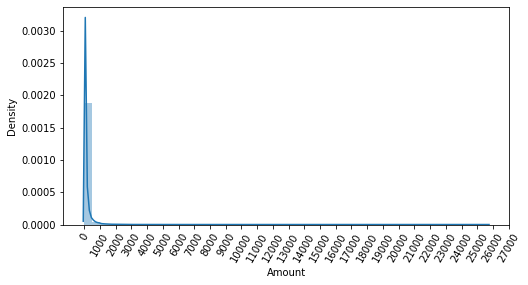

In [ ]:
import seaborn as sns
plt.figure(figsize = (8 , 4))
plt.xticks(range(0 , 30000, 1000) , rotation=60 )
sns.distplot(card_df['Amount'])

In [ ]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용해 정규 분포 형태로 Amount 피처값 변환하는 로직으로 수정.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    #변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 칼럼으로 입력
    df_copy.insert(0 , 'Amount_Scaled' , amount_n)
    #기존 Time, Amount 피처 삭제
    df_copy.drop(['Time' , 'Amount'] , axis=1 , inplace = True)
    return df_copy

In [ ]:
#Amount를 정규 분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행.
X_train , X_test , y_train , y_test = get_train_test_dataset(card_df)

print('###로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf , ftr_train=X_train , ftr_test = X_test , tgt_train = y_train , tgt_test = y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000 , num_leaves=64, n_jobs=-1)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train , tgt_test=y_test)

###로지스틱 회귀 예측 성능 ###
오차 행렬
confusion
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,     F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
confusion
정확도: 0.9964, 정밀도: 0.1073, 재현율: 0.1486,     F1: 0.1246, AUC:0.5765


In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용해 Anount를 로그 변환
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0 , 'Amount_Scaled' , amount_n )
    df_copy.drop(['Time' , 'Amount'] , axis=1 , inplace=True )
    return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval( lr_clf , ftr_train = X_train , ftr_test = X_test , tgt_train=y_train , tgt_test = y_test )

print('### LightGBM 예측 성능 ###')
get_model_train_eval( lgbm_clf , ftr_train = X_train , ftr_test = X_test , tgt_train=y_train , tgt_test = y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
confusion
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,     F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
confusion
정확도: 0.9966, 정밀도: 0.0068, 재현율: 0.0068,     F1: 0.0068, AUC:0.5024


###이상치 데이터 제거 후 모델 학습/예측/평가

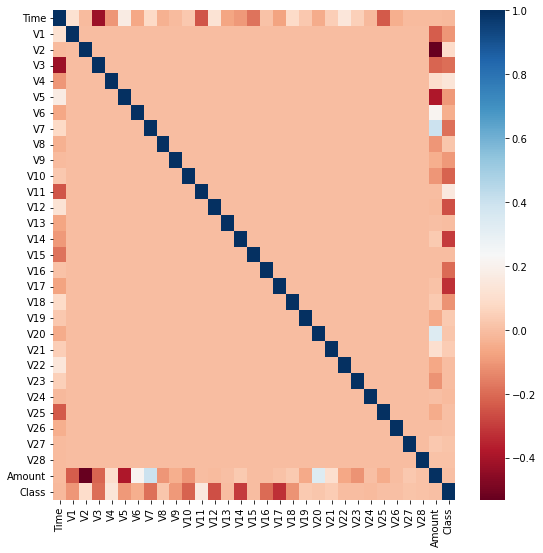

In [ ]:
import seaborn as sns

plt.figure(figsize=(9 , 9))
corr = card_df.corr()
sns.heatmap(corr , cmap='RdBu')

In [ ]:
import numpy as np

def get_outlier(df=None, column=None , weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함.
    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index 반환
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
outlier_index = get_outlier(df=card_df, column='V14' , weight=1.5)
print('이상치 데이터 인덱스:' , outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경.
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p( df_copy['Amount'] )
    df_copy.insert(0, 'Amount_Scaled' , amount_n)
    df_copy.drop(['Time' , 'Amount'] , axis=1 , inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df = df_copy, column='V14' , weight = 1.5)
    df_copy.drop(outlier_index, axis=0 , inplace=True)
    return df_copy

X_train , X_test , y_train , y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train = X_train , ftr_test=X_test , tgt_train = y_train , tgt_test = y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train = X_train , ftr_test = X_test , tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
confusion
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,     F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
confusion
정확도: 0.9973, 정밀도: 0.2000, 재현율: 0.1986,     F1: 0.1993, AUC:0.5986


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X_train , y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape , y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


In [ ]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over , ftr_test = X_test , tgt_train=y_train_over, tgt_test = y_test)

오차 행렬
confusion
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,     F1: 0.1023, AUC:0.9737


In [ ]:
%cd /content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/module

/content/drive/MyDrive/AI/파이썬 머신러닝 완벽가이드/module


In [ ]:
from functions import *
precision_recall_curve_plot( y_test , lr_clf.predict_proba(X_test)[: , 1] )

NameError: ignored

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000 , num_leaves=64 , n_jobs=-1 , boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train = y_train_over, tgt_test = y_test)


오차 행렬
confusion
정확도: 0.9996, 정밀도: 0.9323, 재현율: 0.8493,     F1: 0.8889, AUC:0.9789


## 4-10 스태킹 앙상블

### 기본 스태킹 모델

In [20]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test , y_train , y_test =train_test_split(X_data , y_label , test_size=0.2, random_state = 0)

In [21]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression( C=10 )

In [22]:
# 개별 모델들을 학습.
knn_clf.fit( X_train , y_train )
rf_clf.fit( X_train , y_train )
dt_clf.fit( X_train , y_train )
ada_clf.fit( X_train , y_train )

AdaBoostClassifier(n_estimators=100)

In [23]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)


print('KNN 정확도: {0:.4f}'.format(accuracy_score( y_test , knn_pred )))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test , rf_pred )))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test , dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test , ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561 :


In [24]:
pred = np.array([knn_pred, rf_pred , dt_pred , ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [26]:
lr_final.fit(pred,y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


### CV 세트 기반의 스태킹

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model , X_train_n , y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds , shuffle = False)
    # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros( (X_train_n.shape[0] , 1))
    test_pred = np.zeros( (X_test_n.shape[0], n_folds) )
    print(model.__class__.__name__, ' model 시작')

    for folder_counter, (train_index , valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        # 입력된 원본 테스트 데이터를 폴드 내 학습된 기반 모델에서 예측 후 데이터 저장.
        test_pred[:, folder_counter] = model.predict(X_test_n) 

    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred , axis=1).reshape(-1, 1)

    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred, test_pred_mean

In [49]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train ,y_train, X_test , 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf , X_train , y_train, X_test , 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf , X_train , y_train, X_test , 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf , X_train , y_train, X_test , 7)

KNeighborsClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [50]:
print(knn_train.shape)
print(rf_train.shape)
print(dt_train.shape)
print(ada_test.shape)

(455, 1)
(455, 1)
(455, 1)
(114, 1)


In [51]:
Stack_final_X_train = np.concatenate((knn_train, rf_train , dt_train , ada_train) , axis = 1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test) , axis=1)

print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape (114, 4)


In [53]:
lr_final.fit(Stack_final_X_train , y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
